# 這次的資料有包含九個維度的payment.csv與login.csv(分別是玩家儲值與登陸次數)，由於維度較高，希望可以降維利於視覺化與分類模型的引進。另外，也想看看可不可以透過其他付費點數值的資料去找儲值金額得分布。
#這邊不得不提一下，由於廠商給的資料是.txt，光是資料前處理就耗費許多時間。再加上很肥...有4、5GB，正常電腦根本跑不了。只好用實驗室的server了，感恩數理資訊社，讚嘆數理資訊社!

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

載入payment_character.csv

In [3]:
data_point = pd.read_csv('卓越 payment _ character.csv')
data_point.dropna(how='any',inplace=True)
#所有都是na才丟棄

In [4]:
data_point 
#想依照付費點數值得玩家間的相近關係去求出某些類別的玩家可能願意儲值的金額

,賬號ID,帳號,付費點1數值,付費點2數值,付費點3數值,付費點4數值,付費點5數值,付費點6數值,付費點7數值,付費點8數值
0,45484840.0,45484840,149,10,0,0,0,18771,8972,10964
1,45484834.0,45484834,52,4,0,0,0,5304,1817,4681
2,45484814.0,45484814,27,2,0,0,0,1719,588,2697
3,45484700.0,45484700,88,6,0,0,0,8376,2413,8185
4,45484664.0,45484664,4,0,0,0,0,204,25,298
5,45484663.0,45484663,4,0,0,0,0,204,24,286
6,45484662.0,45484662,10,0,0,0,0,540,34,465
7,45484661.0,45484661,9,0,0,0,0,459,55,712
8,45484660.0,45484660,63,0,0,0,0,5009,123,1808
9,45484655.0,45484655,102,20,0,1,5,15632,25439,26720


載入login_payment.csv

In [5]:
df_payment = pd.read_csv('login_payment.csv')
df_payment.dropna(how='any',inplace=True)

/home/andyhung/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df_payment.shape
#4*10**7...難怪用excel載直接掛掉XD


(42449598, 4)

In [7]:
df_payment.head(5)
#偷看一下

,賬號ID,交易成功時間,儲值金額,登陸時間
0,﻿賬號ID,交易成功時間,儲值金額,登陸時間
1,27161536,2017-05-27 18:25:01.0000000,2000,2018-04-18 00:00:00.0000000
2,27161536,2017-05-29 13:27:08.0000000,2000,2018-04-18 00:00:00.0000000
3,27161536,2017-06-10 11:30:47.0000000,50,2018-04-18 00:00:00.0000000
4,27161536,2017-06-10 11:31:17.0000000,500,2018-04-18 00:00:00.0000000


In [8]:
df_payment = df_payment.iloc[1:]
df_payment
#發現.txt轉檔時column name不小心存到了，趕緊更正一下

,賬號ID,交易成功時間,儲值金額,登陸時間
1,27161536,2017-05-27 18:25:01.0000000,2000,2018-04-18 00:00:00.0000000
2,27161536,2017-05-29 13:27:08.0000000,2000,2018-04-18 00:00:00.0000000
3,27161536,2017-06-10 11:30:47.0000000,50,2018-04-18 00:00:00.0000000
4,27161536,2017-06-10 11:31:17.0000000,500,2018-04-18 00:00:00.0000000
5,27161536,2017-02-14 19:33:14.0000000,500,2018-04-18 00:00:00.0000000
6,27161536,2017-03-13 17:44:33.0000000,1000,2018-04-18 00:00:00.0000000
7,27161536,2017-04-07 16:51:08.0000000,1000,2018-04-18 00:00:00.0000000
8,27161536,2018-02-03 17:28:16.0000000,1000,2018-04-18 00:00:00.0000000
9,27161536,2018-02-03 17:28:33.0000000,1000,2018-04-18 00:00:00.0000000
10,27161536,2018-05-17 12:50:19.0000000,500,2018-04-18 00:00:00.0000000


In [9]:
df_payment.dtypes

賬號ID      object
交易成功時間    object
儲值金額      object
登陸時間      object
dtype: object

In [10]:
#為了統計帳號總登入次數與儲值金額要換個dtype
df_payment['儲值金額'] = df_payment['儲值金額'].astype(int)
df_payment.dtypes

賬號ID      object
交易成功時間    object
儲值金額       int64
登陸時間      object
dtype: object

In [11]:
temp = df_payment.groupby(["賬號ID"])["儲值金額"].sum()
#之後要把data_point跟df_payment合併，這裡要求的是每個玩家的總儲值金額

In [12]:
#換成dataframe才可以跟別人合~
temp = pd.DataFrame({'賬號ID':temp.index, '儲值金額':temp.values})




In [13]:
temp.columns=["帳號","儲值金額"]

In [14]:
temp


,帳號,儲值金額
0,1289872,1468800
1,1290144,35019360
2,1293472,45300
3,1317520,200
4,1323552,1120000
5,1326912,75300
6,1330672,582000
7,1335056,1606500
8,1339840,1315800
9,1341104,5439000


In [15]:
#這會包含原本dataframe再加上欲加入的新的df的行
#把datapoint跟儲值金額合併，以帳號為key去對齊
Full = pd.merge(data_point,temp[['帳號','儲值金額']],on = '帳號', how='left')
Full

,賬號ID,帳號,付費點1數值,付費點2數值,付費點3數值,付費點4數值,付費點5數值,付費點6數值,付費點7數值,付費點8數值,儲值金額
0,45484840.0,45484840,149,10,0,0,0,18771,8972,10964,7440.0
1,45484834.0,45484834,52,4,0,0,0,5304,1817,4681,9000.0
2,45484814.0,45484814,27,2,0,0,0,1719,588,2697,1200.0
3,45484700.0,45484700,88,6,0,0,0,8376,2413,8185,12500.0
4,45484664.0,45484664,4,0,0,0,0,204,25,298,1653000.0
5,45484663.0,45484663,4,0,0,0,0,204,24,286,7000000.0
6,45484662.0,45484662,10,0,0,0,0,540,34,465,7462000.0
7,45484661.0,45484661,9,0,0,0,0,459,55,712,6578000.0
8,45484660.0,45484660,63,0,0,0,0,5009,123,1808,10439000.0
9,45484655.0,45484655,102,20,0,1,5,15632,25439,26720,49680.0


In [16]:
#看一下有沒有儲值金額的遺失值或是他根本沒儲值過
Full[Full['儲值金額'].isnull()]


,賬號ID,帳號,付費點1數值,付費點2數值,付費點3數值,付費點4數值,付費點5數值,付費點6數值,付費點7數值,付費點8數值,儲值金額
1085,45409109.0,45409109,82,4,0,0,0,9336,1524,10232,NaN
1092,45409023.0,45409023,119,7,0,0,0,7969,2227,13361,NaN
1093,45409020.0,45409020,1,0,0,0,0,51,6,76,NaN
1095,45408986.0,45408986,1,0,0,0,0,51,6,88,NaN
1130,45408515.0,45408515,2,0,0,0,0,102,13,146,NaN
1137,45408393.0,45408393,2,0,0,0,0,102,13,134,NaN
1139,45408370.0,45408370,92,30,0,0,0,13081,5691,13747,NaN
1141,45408360.0,45408360,121,10,0,0,0,10999,3009,8961,NaN
1148,45408333.0,45408333,68,4,0,0,0,8024,2673,3757,NaN
1155,45408187.0,45408187,7,0,0,0,0,399,136,1202,NaN


In [17]:
#有559筆資料沒有儲值金額，有可能是他們從來都沒儲值過或是資料遺失，經過討論我們以最保守的方式刪除資料，原因為考慮等一下要使用的方法"PCA"對於outlier會被影響很嚴重。
Full["儲值金額"].isnull().sum()


559

In [18]:
#Full["儲值金額"] = Full["儲值金額"].fillna(0)
Full = Full.dropna()


換來處理 "登入次數"

In [19]:
temp01 = df_payment.groupby(['賬號ID']).size()
temp01

賬號ID
1289872     5814
1290144    20916
1293472      302
1317520        4
1323552     1344
1326912      251
1330672      776
1335056     2295
1339840     2322
1341104    11760
1341488       10
1341520     5496
1342960      205
1344736     2260
1345552       75
1347776    17556
1349072       15
1355616      428
1357408     1860
1360432      278
1361552     1017
1364464     8988
1365744      103
1368368    48372
1369904    23100
1373264     1856
1373488     5104
1374736     8334
1376640     1380
1379840     2176
           ...  
9144560       52
9157872        5
9193968      152
9199328        5
9212560        5
9229872        1
9234528        3
9234656        3
9244144        6
9286240        5
9375168        8
9394992        7
9413408        9
9414176       32
9415424        4
9419056       66
9430368       12
9456160       43
9516960        6
9521712       12
9628208       15
9641840       56
9669920      409
9734320      177
9758336       38
9784320        6
9785776       45
9805008  

In [22]:
temp01.columns=["帳號","登入次數"]

In [24]:
#一樣，這邊merge以Full為主去merge，以帳號為key去對齊。
complete_data = pd.merge(Full,temp01[['帳號','登入次數']],on = '帳號', how='left')
complete_data

,賬號ID,帳號,付費點1數值,付費點2數值,付費點3數值,付費點4數值,付費點5數值,付費點6數值,付費點7數值,付費點8數值,儲值金額,登入次數
0,45484840.0,45484840,149,10,0,0,0,18771,8972,10964,7440.0,62
1,45484834.0,45484834,52,4,0,0,0,5304,1817,4681,9000.0,9
2,45484814.0,45484814,27,2,0,0,0,1719,588,2697,1200.0,3
3,45484700.0,45484700,88,6,0,0,0,8376,2413,8185,12500.0,30
4,45484664.0,45484664,4,0,0,0,0,204,25,298,1653000.0,304
5,45484663.0,45484663,4,0,0,0,0,204,24,286,7000000.0,1400
6,45484662.0,45484662,10,0,0,0,0,540,34,465,7462000.0,1476
7,45484661.0,45484661,9,0,0,0,0,459,55,712,6578000.0,1380
8,45484660.0,45484660,63,0,0,0,0,5009,123,1808,10439000.0,2190
9,45484655.0,45484655,102,20,0,1,5,15632,25439,26720,49680.0,552


In [25]:
complete_data[complete_data['登入次數'].isnull()]
#沒有NA值了，這樣就是完整的資料了!

,賬號ID,帳號,付費點1數值,付費點2數值,付費點3數值,付費點4數值,付費點5數值,付費點6數值,付費點7數值,付費點8數值,儲值金額,登入次數


In [ ]:
#complete_data["登入次數"].isnull().sum()

In [ ]:
#居然也是559筆且還是一樣的帳號，果然儲存資料時可能發生一些問題。這邊我們一樣補零

In [ ]:
#complete_data["登入次數"] = complete_data["登入次數"].fillna(0)
#complete_data = complete_data.dropna()


In [ ]:
#complete_data

In [ ]:
#complete_data['儲值金額'] = complete_data['儲值金額'].astype(int)
#complete_data['登入次數'] = complete_data['登入次數'].astype(int)




In [26]:
complete_data.describe()

,賬號ID,付費點1數值,付費點2數值,付費點3數值,付費點4數值,付費點5數值,付費點6數值,付費點7數值,付費點8數值,儲值金額,登入次數
count,8.804000e+03,8804.000000,8804.000000,8.804000e+03,8804.000000,8804.000000,8804.000000,8.804000e+03,8.804000e+03,8.804000e+03,8804.000000
mean,3.388151e+07,276.739096,55.784871,1.794268e+08,2.727283,313.896865,37985.031122,9.206763e+04,2.205031e+05,7.499070e+06,4806.278510
std,1.369744e+07,213.051591,49.099942,4.051621e+08,2.875196,714.867104,30713.044516,1.359880e+05,3.461595e+05,3.674877e+07,15867.269825
min,1.289872e+06,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,5.000000e+01,1.000000
25%,2.649850e+07,105.000000,22.000000,0.000000e+00,0.000000,0.000000,15675.750000,1.116575e+04,1.614875e+04,2.100000e+04,115.000000
50%,3.824843e+07,209.000000,42.000000,1.623130e+05,2.000000,49.000000,27171.500000,4.798100e+04,8.603400e+04,2.453500e+05,448.000000
75%,4.532117e+07,390.000000,79.000000,1.026344e+08,4.000000,379.000000,52007.000000,1.138525e+05,2.850242e+05,2.073525e+06,2772.500000
max,4.548484e+07,3599.000000,620.000000,3.404995e+09,26.000000,31108.000000,289506.000000,1.533808e+06,4.669570e+06,1.214330e+09,433296.000000


In [31]:
Mean = complete_data["儲值金額"].mean()
Std = complete_data["儲值金額"].std()

## 先label一下，已經先對data取log，大致分為四類
### 分別是(-std之外)、(-std,mean)、(mean,std)、(std以外)

In [33]:
labels = []
for i in range(complete_data.shape[0]):
    x = complete_data.loc[ i , : ]["儲值金額"]
    if (x <Mean-Std) :
        x = 0
    elif (x > Mean-Std) & (x <=Mean) :
        x = 1
    elif(x > Mean) & (x <=Mean+Std):
        x= 2
    else:
        x = 3
        
    #elif (x > complete_data_mean+complete_data_std) & (x <= complete_data_mean+complete_data_std) :
   #     x = 2
    #else:
    #    x=3
#    elif (x > complete_data_mean) & (x <= complete_data_mean+complete_data_std) :
#        x = 3
#   elif (x > complete_data_mean + complete_data_std) & (x <= complete_data_mean+2*complete_data_std) :
#        x = 4
#    else:
#        x = 5
    labels.append(x)
    

In [34]:
labels = pd.DataFrame(labels)

In [35]:
complete_data["label"] = labels


### 畫個圖看看分布

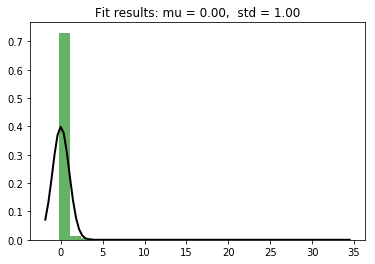

In [27]:
from sklearn.preprocessing import scale
from scipy.stats import norm
fig_size = plt.rcParams["figure.figsize"]


# Generate some data for this demonstration.
data = scale(complete_data["儲值金額"].values)
# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
plt.rcParams["figure.figsize"] = fig_size
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# Set figure width to 12 and height to 9
fig_size[0] = 24
fig_size[1] = 16
plt.rcParams["figure.figsize"] = fig_size
plt.show()

### 哇也右偏太嚴重了吧...參考:https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/ 當中提到可藉由取log使分布較符合鐘型曲線

In [28]:
#對儲值金額取log
complete_data["儲值金額"] = complete_data["儲值金額"].apply(np.log)


In [29]:
complete_data["登入次數"] = complete_data["登入次數"].apply(np.log)


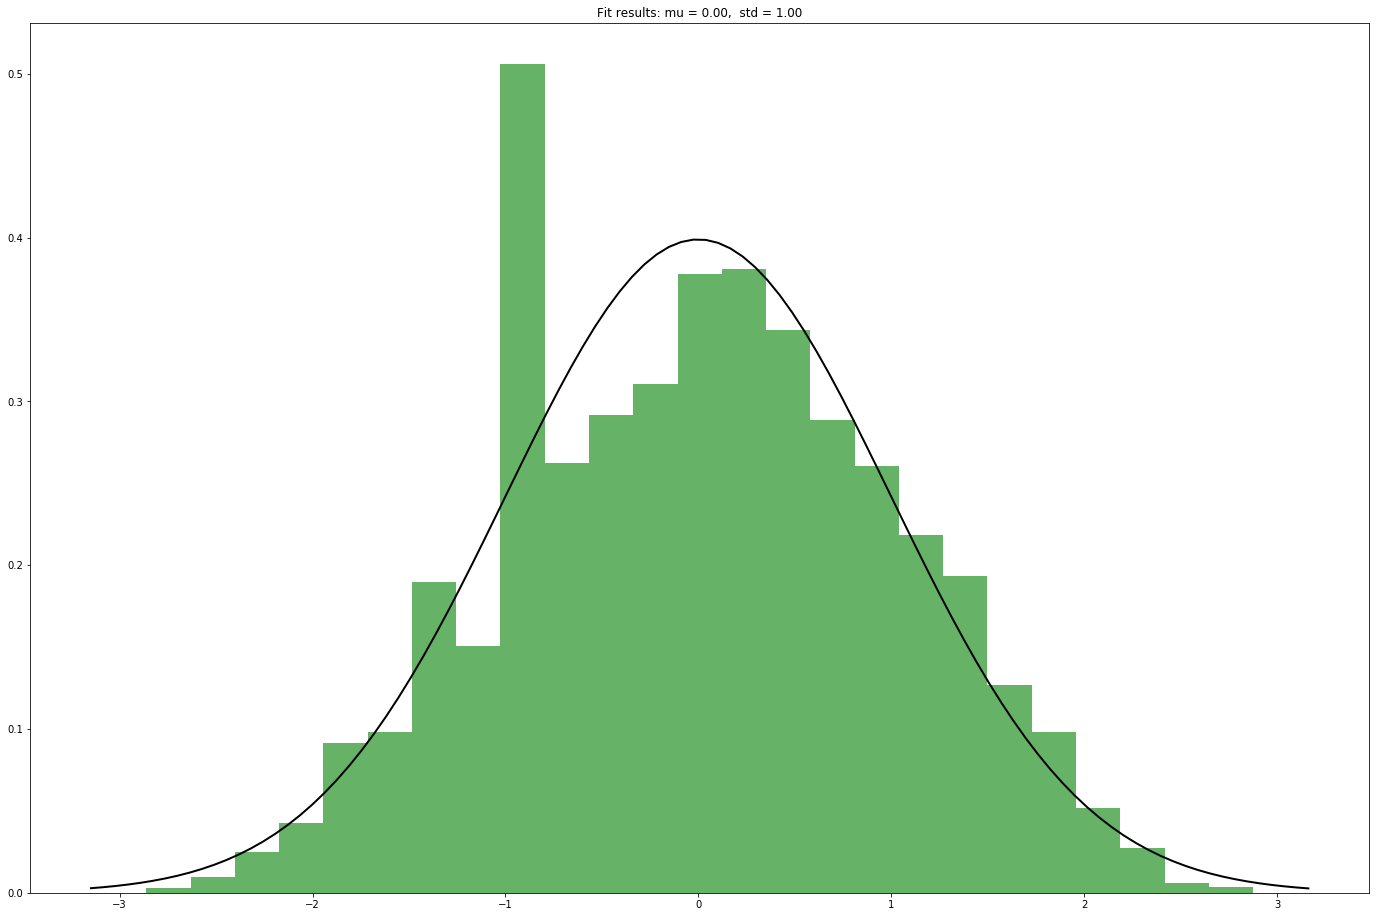

In [30]:
#再畫一次對比
fig_size = plt.rcParams["figure.figsize"]


# Generate some data for this demonstration.
data = scale(complete_data["儲值金額"].values)
# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
plt.rcParams["figure.figsize"] = fig_size
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# Set figure width to 12 and height to 9
fig_size[0] = 24
fig_size[1] = 16
plt.rcParams["figure.figsize"] = fig_size
plt.show()

In [ ]:
#果然好多了XD

In [36]:
complete_data

,賬號ID,帳號,付費點1數值,付費點2數值,付費點3數值,付費點4數值,付費點5數值,付費點6數值,付費點7數值,付費點8數值,儲值金額,登入次數,label
0,45484840.0,45484840,149,10,0,0,0,18771,8972,10964,8.914626,4.127134,0
1,45484834.0,45484834,52,4,0,0,0,5304,1817,4681,9.104980,2.197225,0
2,45484814.0,45484814,27,2,0,0,0,1719,588,2697,7.090077,1.098612,0
3,45484700.0,45484700,88,6,0,0,0,8376,2413,8185,9.433484,3.401197,1
4,45484664.0,45484664,4,0,0,0,0,204,25,298,14.318102,5.717028,2
5,45484663.0,45484663,4,0,0,0,0,204,24,286,15.761421,7.244228,3
6,45484662.0,45484662,10,0,0,0,0,540,34,465,15.825334,7.297091,3
7,45484661.0,45484661,9,0,0,0,0,459,55,712,15.699241,7.229839,3
8,45484660.0,45484660,63,0,0,0,0,5009,123,1808,16.161059,7.691657,3
9,45484655.0,45484655,102,20,0,1,5,15632,25439,26720,10.813358,6.313548,1


## 到這邊真的是喜極而泣，終於把資料前處理搞定了嗚嗚嗚...

# 線性回歸

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
X = complete_data["登入次數"].to_frame()  # converts it into a numpy array
Y = complete_data["儲值金額"].to_frame()  #  converts it into a numpy array
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

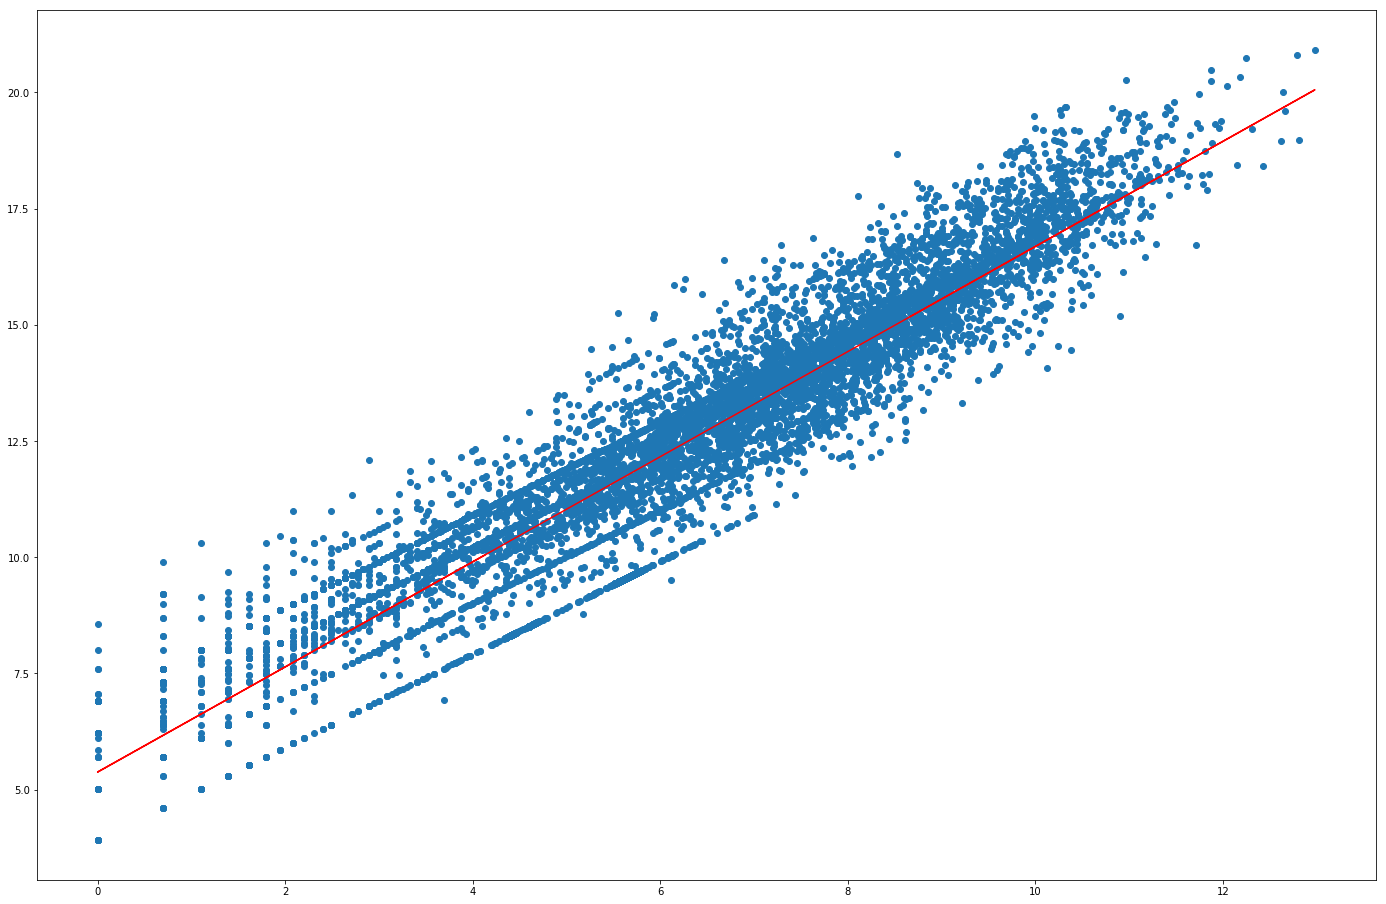

In [39]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [ ]:
#from pandas import DataFrame

#df = DataFrame(temp03,columns=['付費點1數值','付費點2數值','付費點3數值','付費點4數值','付費點5數值','付費點6數值','付費點7數值','付費點8數值','儲值金額','登入次數'])


In [ ]:
#df

In [40]:
complete_data.describe()

,賬號ID,付費點1數值,付費點2數值,付費點3數值,付費點4數值,付費點5數值,付費點6數值,付費點7數值,付費點8數值,儲值金額,登入次數,label
count,8.804000e+03,8804.000000,8804.000000,8.804000e+03,8804.000000,8804.000000,8804.000000,8.804000e+03,8.804000e+03,8804.000000,8804.000000,8804.000000
mean,3.388151e+07,276.739096,55.784871,1.794268e+08,2.727283,313.896865,37985.031122,9.206763e+04,2.205031e+05,12.393246,6.205002,1.531917
std,1.369744e+07,213.051591,49.099942,4.051621e+08,2.875196,714.867104,30713.044516,1.359880e+05,3.461595e+05,2.963821,2.430305,0.944082
min,1.289872e+06,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,3.912023,0.000000,0.000000
25%,2.649850e+07,105.000000,22.000000,0.000000e+00,0.000000,0.000000,15675.750000,1.116575e+04,1.614875e+04,9.952278,4.744932,1.000000
50%,3.824843e+07,209.000000,42.000000,1.623130e+05,2.000000,49.000000,27171.500000,4.798100e+04,8.603400e+04,12.410440,6.104793,2.000000
75%,4.532117e+07,390.000000,79.000000,1.026344e+08,4.000000,379.000000,52007.000000,1.138525e+05,2.850242e+05,14.544761,7.927505,2.000000
max,4.548484e+07,3599.000000,620.000000,3.404995e+09,26.000000,31108.000000,289506.000000,1.533808e+06,4.669570e+06,20.917459,12.979176,3.000000


In [41]:
complete_data_forPCA01 = complete_data.drop(columns = ["賬號ID","帳號"])

In [42]:
complete_data_forPCA01

,付費點1數值,付費點2數值,付費點3數值,付費點4數值,付費點5數值,付費點6數值,付費點7數值,付費點8數值,儲值金額,登入次數,label
0,149,10,0,0,0,18771,8972,10964,8.914626,4.127134,0
1,52,4,0,0,0,5304,1817,4681,9.104980,2.197225,0
2,27,2,0,0,0,1719,588,2697,7.090077,1.098612,0
3,88,6,0,0,0,8376,2413,8185,9.433484,3.401197,1
4,4,0,0,0,0,204,25,298,14.318102,5.717028,2
5,4,0,0,0,0,204,24,286,15.761421,7.244228,3
6,10,0,0,0,0,540,34,465,15.825334,7.297091,3
7,9,0,0,0,0,459,55,712,15.699241,7.229839,3
8,63,0,0,0,0,5009,123,1808,16.161059,7.691657,3
9,102,20,0,1,5,15632,25439,26720,10.813358,6.313548,1


# PCA(主成份分析)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
# split into training and testing sets
X, y = complete_data_forPCA01.iloc[:, 0:10].values,complete_data_forPCA01.iloc[:, 10].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,
    stratify=y, random_state=0
)
# standardize the features
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [44]:
X.shape

(8804, 10)

In [45]:
y.shape

(8804,)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# intialize pca and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

# fit and transform data
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

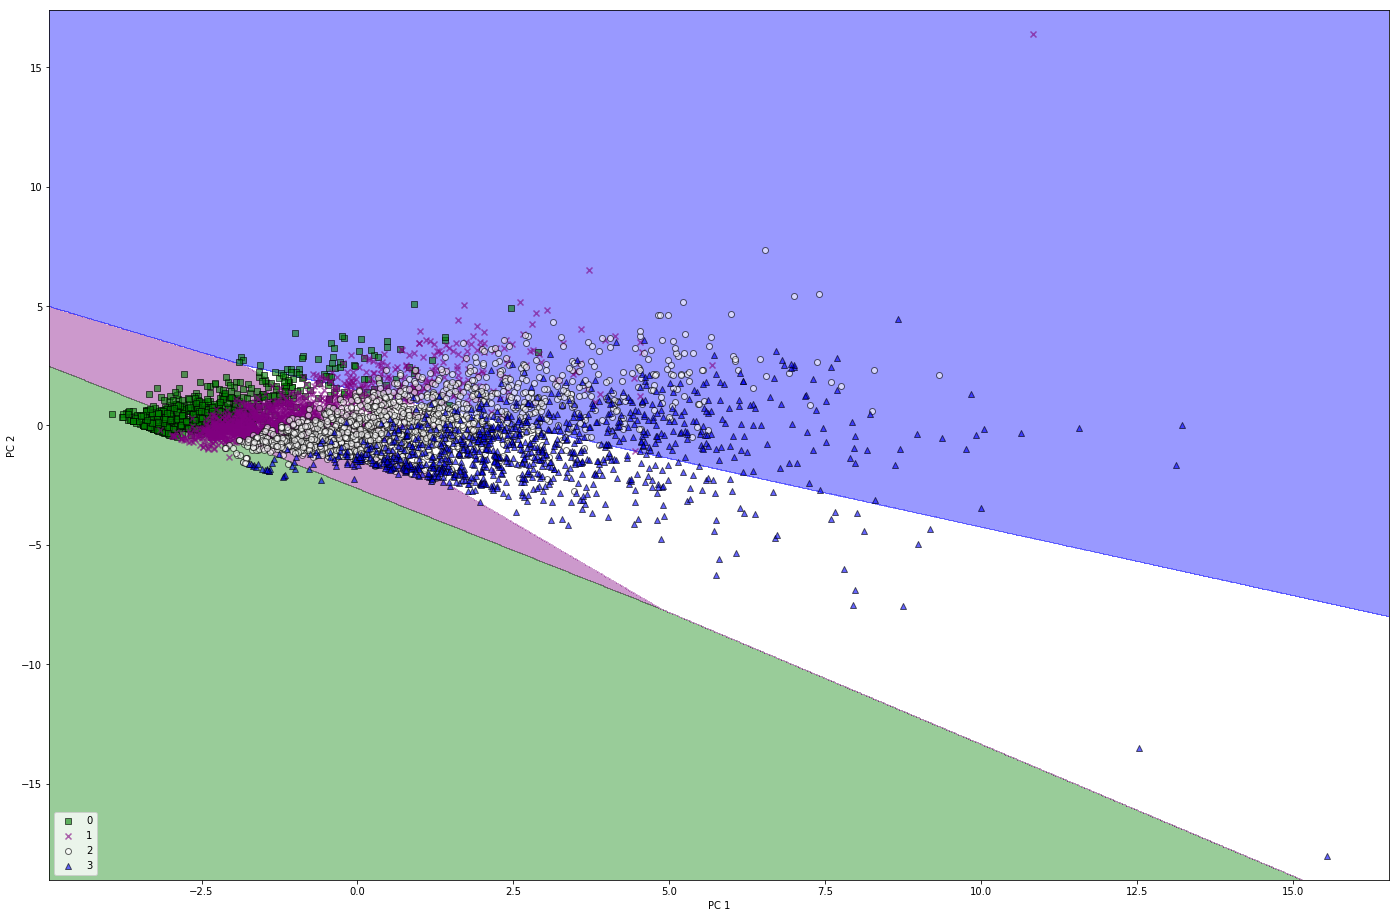

In [62]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v','<')
    colors = ('green', 'purple', 'white', 'blue', 'brown')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)# plot decision regions for training set
    

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

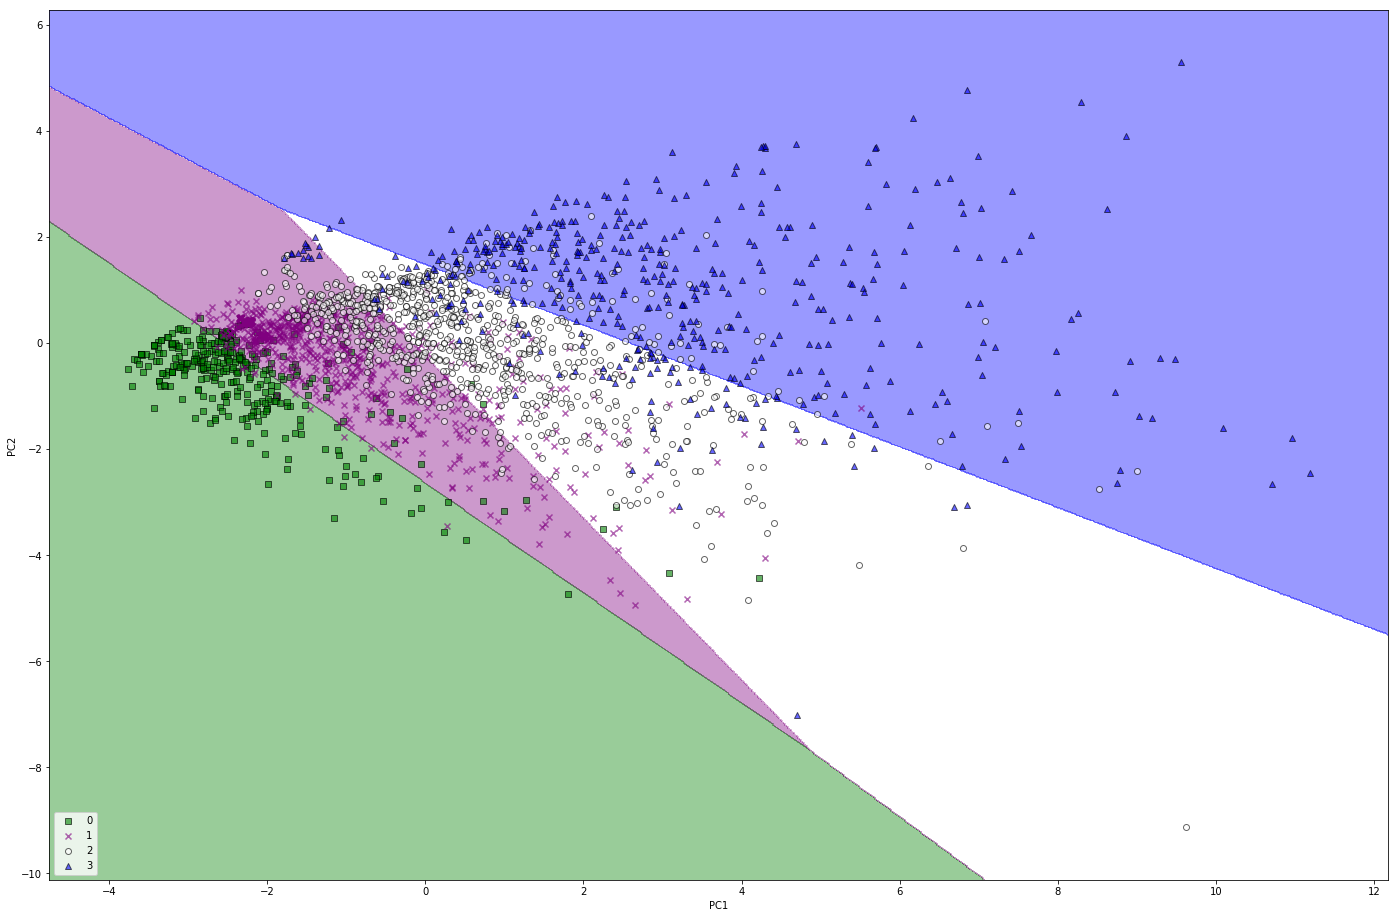

In [48]:
#plot decision regions for test set
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

# 根據Lorraine Li大大手把手去寫PCA
## https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split into training and testing sets
X, y = complete_data_forPCA01.iloc[:, :10].values, complete_data_forPCA01.iloc[:, 10].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.36,
    stratify=y, random_state=0
)

# standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# 這邊算covariance matrix 跟 求eigen pair
## 一行程式換我算一面A4的特徵多項式XD

In [50]:
import numpy as np

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

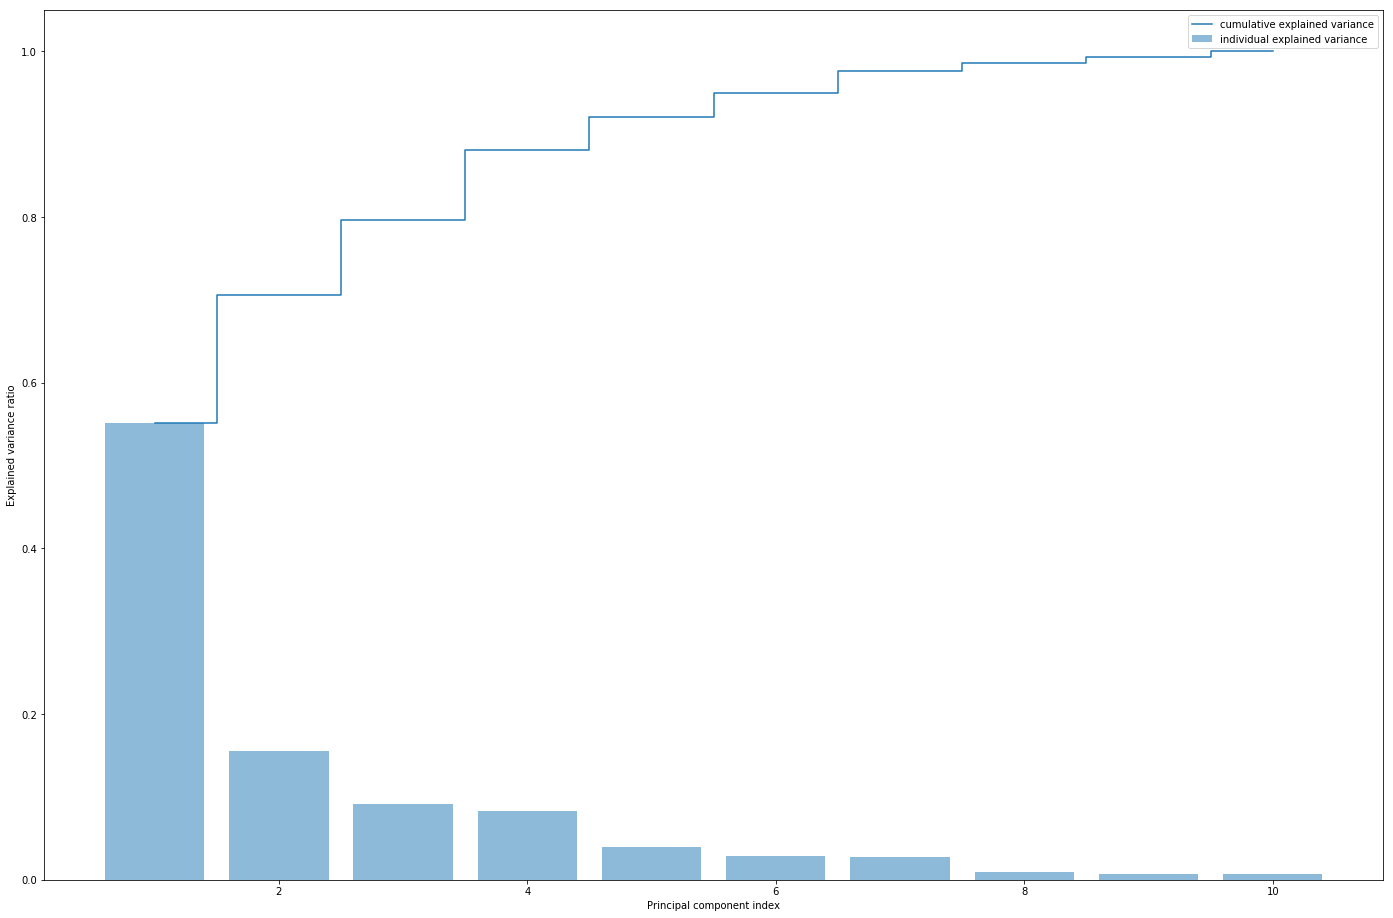

In [52]:
import matplotlib.pyplot as plt

# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.bar(range(1,11), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,11), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

# 上圖說明前兩個特徵值佔了7成的變異!

In [53]:
# Make a list of (eigenvalue, eigenvector) tuples
#這邊是找出以特徵值的大到小來排序對映的特徵向量
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [54]:
eigen_pairs

[(5.510736735493022,
  array([0.29283525, 0.34839089, 0.18381861, 0.37308771, 0.25351719,
         0.35672393, 0.33526273, 0.32988762, 0.33225799, 0.31103432])),
 (1.5491532769364877,
  array([ 0.53261004,  0.40333512, -0.01124838,  0.02936748, -0.33244443,
          0.36927799, -0.1759569 , -0.27865391, -0.31101395, -0.31691373])),
 (0.9122825646466789,
  array([ 0.0830054 ,  0.0077722 , -0.76680248, -0.08364416,  0.4132026 ,
          0.10891862,  0.22859363,  0.22803177, -0.2096913 , -0.25931386])),
 (0.8365086990676956,
  array([-0.0977055 , -0.01112488,  0.55519511,  0.15811888,  0.41462184,
         -0.07806024,  0.10093905,  0.18058344, -0.43685596, -0.49541883])),
 (0.397840375175781,
  array([ 0.23527941,  0.04076661,  0.0635251 , -0.25575137,  0.57836576,
          0.03502333, -0.70419377, -0.03322698,  0.10502956,  0.17256824])),
 (0.28944709186255285,
  array([ 0.08567694, -0.06820744,  0.10426404, -0.22984262,  0.3491066 ,
          0.06263054,  0.47251681, -0.75125742,  0

## 這個矩陣作用到每個點(資料)相當於要把這些點投影到剛選出之前兩個PC上

In [55]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.29283525  0.53261004]
 [ 0.34839089  0.40333512]
 [ 0.18381861 -0.01124838]
 [ 0.37308771  0.02936748]
 [ 0.25351719 -0.33244443]
 [ 0.35672393  0.36927799]
 [ 0.33526273 -0.1759569 ]
 [ 0.32988762 -0.27865391]
 [ 0.33225799 -0.31101395]
 [ 0.31103432 -0.31691373]]


In [56]:
X_train_std[0].dot(w)


array([-2.53044446, -0.1209405 ])

In [57]:
X_train_pca = X_train_std.dot(w)


In [58]:
X_train_pca.shape

(5634, 2)

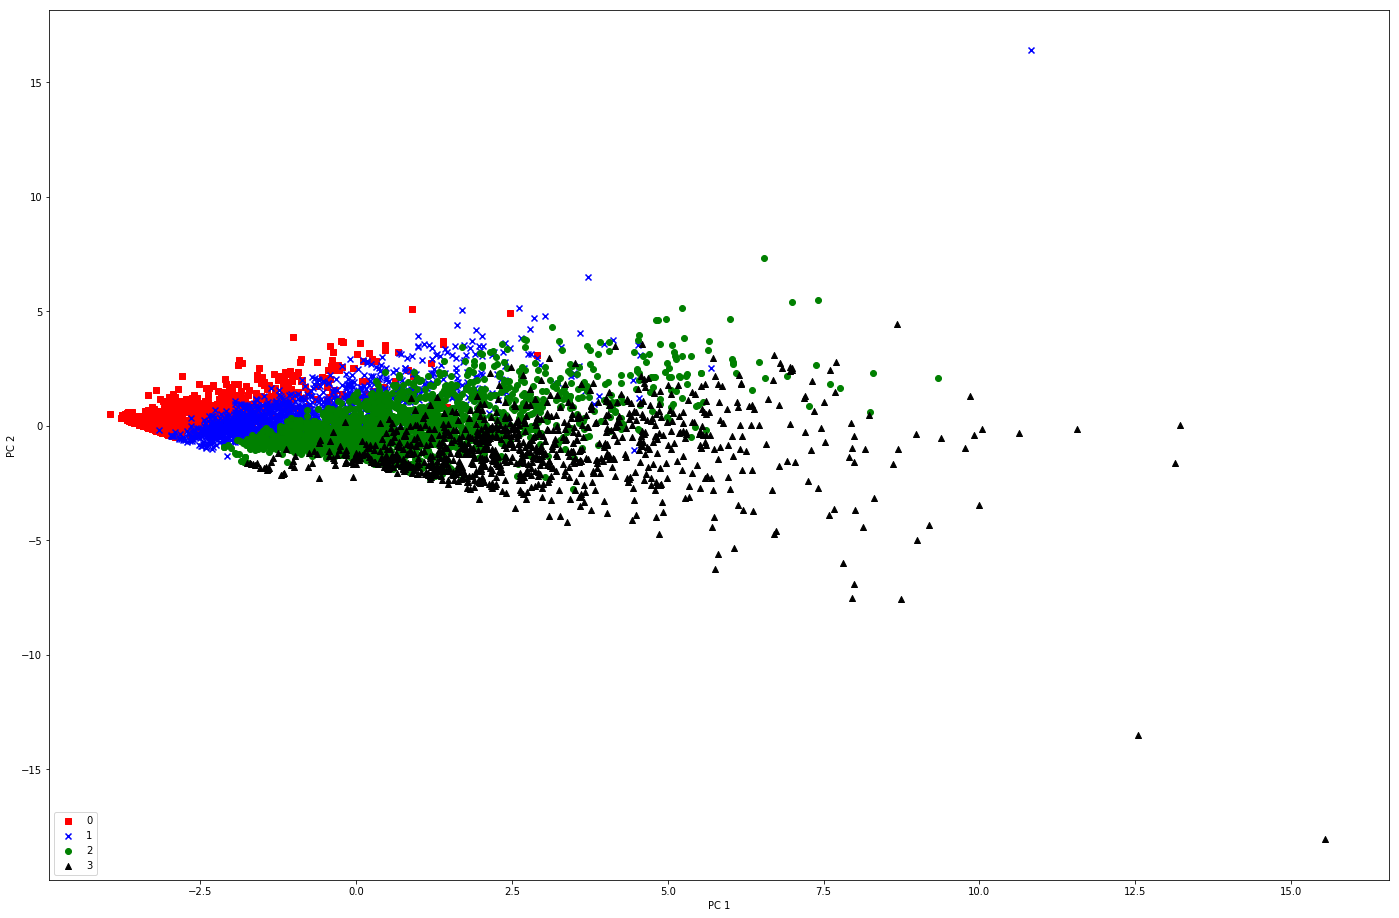

In [59]:
colors = ['r', 'b', 'g','k']
markers = ['s', 'x', 'o','^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

## 我換三根特徵向量看看

In [63]:
w1 = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis],eigen_pairs[2][1][:, np.newaxis]))
print('Matrix W:\n', w1)

Matrix W:
 [[ 0.29283525  0.53261004  0.0830054 ]
 [ 0.34839089  0.40333512  0.0077722 ]
 [ 0.18381861 -0.01124838 -0.76680248]
 [ 0.37308771  0.02936748 -0.08364416]
 [ 0.25351719 -0.33244443  0.4132026 ]
 [ 0.35672393  0.36927799  0.10891862]
 [ 0.33526273 -0.1759569   0.22859363]
 [ 0.32988762 -0.27865391  0.22803177]
 [ 0.33225799 -0.31101395 -0.2096913 ]
 [ 0.31103432 -0.31691373 -0.25931386]]


In [64]:
X_train_pca = X_train_std.dot(w1)


In [65]:
X_train_pca

array([[-2.53044446, -0.1209405 ,  0.27563413],
       [-2.39504934, -0.27457946,  0.17313386],
       [-0.37818249,  0.81202294,  0.10261324],
       ...,
       [-2.39099193, -0.28140775,  0.16504337],
       [ 0.55058052, -0.06776326, -1.49456301],
       [ 1.20549139, -1.58712181, -0.73484116]])

/home/andyhung/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


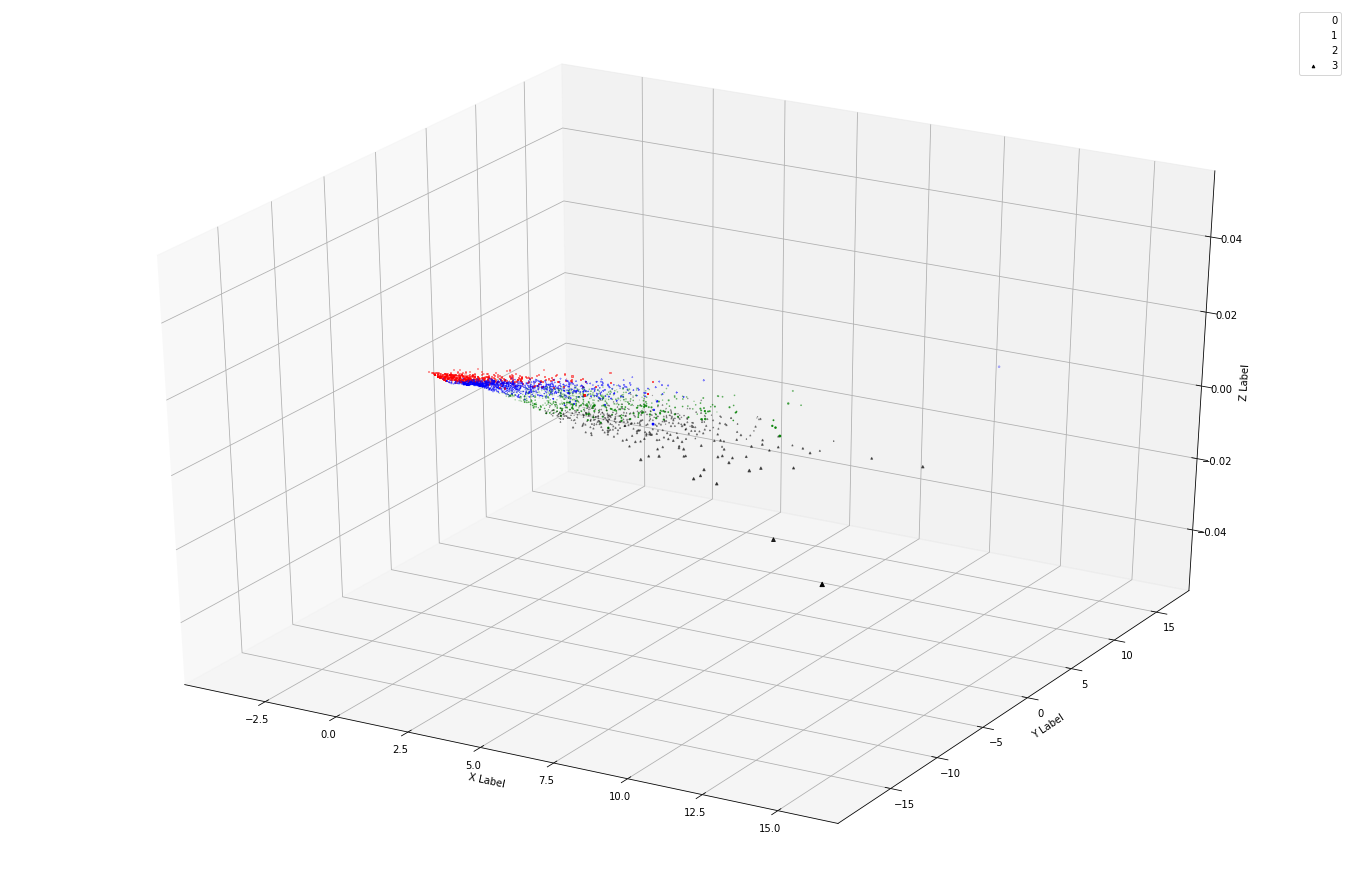

In [66]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import




fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
#for i in range(X_train_pca.shape[0]):
#    xs = X_train_pca[i,0]
#    ys = X_train_pca[i,1]
#    zs = X_train_pca[i,2]
#    ax.scatter(xs, ys, zs, marker=m)
colors = ['r', 'b', 'g','k']
markers = ['s', 'x', 'o','^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1],
                 X_train_pca[y_train==l, 2],
                c=c, label=l, marker=m) 

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.legend(loc='best')


plt.show()

# 好像分得還行~ 這邊用的是EVD(特徵值分解)，之後會研究SVD(奇異值分解)，看一下這兩個方法產生的投影矩陣有甚麼影響。

# 參考資料
https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

https://thispointer.com/python-pandas-count-number-of-nan-or-missing-values-in-dataframe-also-row-column-wise/

https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d

https://ithelp.ithome.com.tw/articles/10187314